In [2]:
import csv
import cv2
#import matplotlib.pyplot as plt
#import pickle
import numpy as np
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import time 
from ggplot import *

with open('/Users/JosephVele/MURA-v1.1/train_image_paths.csv', 'r') as f:
    reader = csv.reader(f)
    image_paths = list(reader)

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
images=[]
labels = [] # Bodypart
labels_2 = [] #Abnormalities
for i in range(len(image_paths)):
    image = cv2.imread(image_paths[i][0],cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(image,(150,150))
    images.append(new_array)
    if "negative" in image_paths[i][0]: 
        labels_2.append("NEGATIVE")
    elif "positive" in image_paths[i][0]: 
        labels_2.append("POSITIVE")
    if "ELBOW" in image_paths[i][0]: 
        labels.append("ELBOW")
    elif "FINGER" in image_paths[i][0]: 
        labels.append("FINGER")
    elif "FOREARM" in image_paths[i][0]: 
        labels.append("FOREARM")
    elif "HAND" in image_paths[i][0]: 
        labels.append("HAND")
    elif "HUMERUS" in image_paths[i][0]: 
        labels.append("HUMERUS")
    elif "SHOULDER" in image_paths[i][0]: 
        labels.append("SHOULDER")
    elif "WRIST" in image_paths[i][0]: 
        labels.append("WRIST")

In [4]:
images_reshaped=np.array(images).reshape(36808,22500)
images_df = pd.DataFrame(images_reshaped)

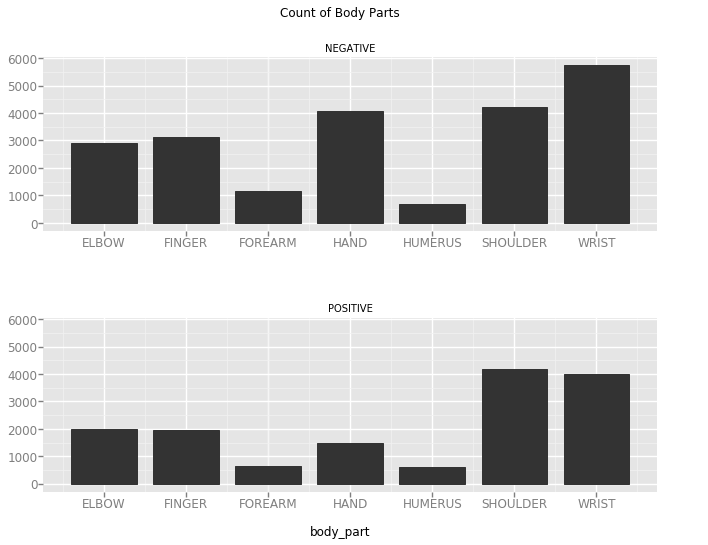

<ggplot: (7609679403)>

In [8]:
chart = ggplot( images_df, aes('body_part') ) \
        + geom_bar() \
        + ggtitle("Count of Body Parts")\
        + facet_wrap("abnormal") 
chart

In [5]:
# T SNE
rndperm = np.random.permutation(images_df.shape[0])
n_sne = 2000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(images_df.loc[rndperm[:n_sne],].values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

images_df ['abnormal'] = labels_2
images_df ['body_part'] = labels

df_tsne = images_df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 3.248s...
[t-SNE] Computed neighbors for 2000 samples in 169.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1213.830044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.503426
[t-SNE] Error after 300 iterations: 1.594503
t-SNE done! Time elapsed: 196.42149686813354 seconds


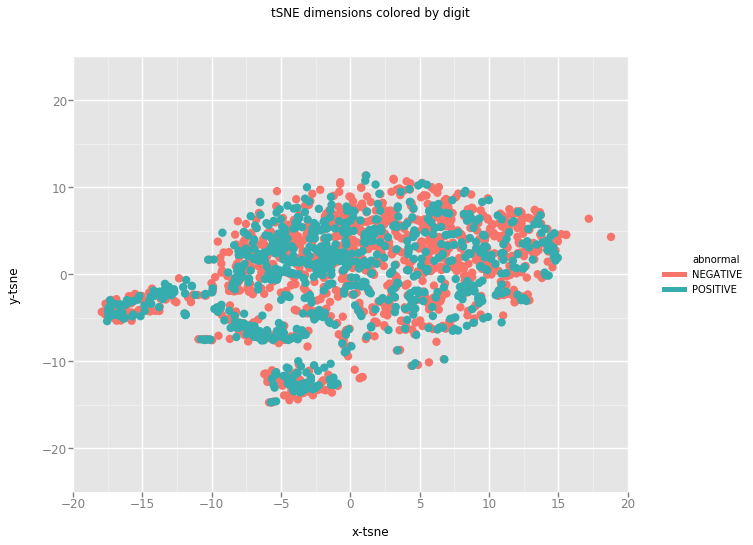

<ggplot: (7541460870)>

In [5]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='abnormal') ) \
        + geom_point(size=70, alpha = .75) \
        + ggtitle("tSNE dimensions colored by digit")\
        + scale_y_continuous(limits=(-25,25)) \
        + scale_x_continuous(limits=(-20,20))
chart

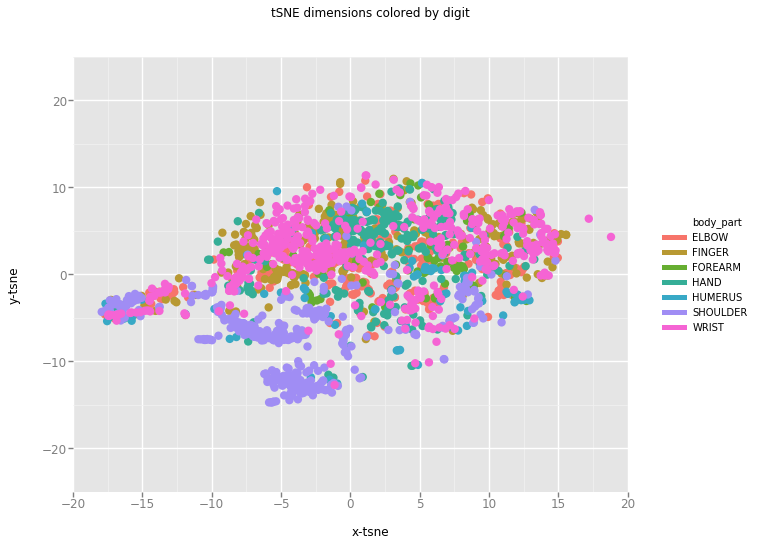

<ggplot: (7543149779)>

In [6]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='body_part') ) \
        + geom_point(size=70, alpha = .75) \
        + ggtitle("tSNE dimensions colored by digit")\
        + scale_y_continuous(limits=(-25,25)) \
        + scale_x_continuous(limits=(-20,20))
chart

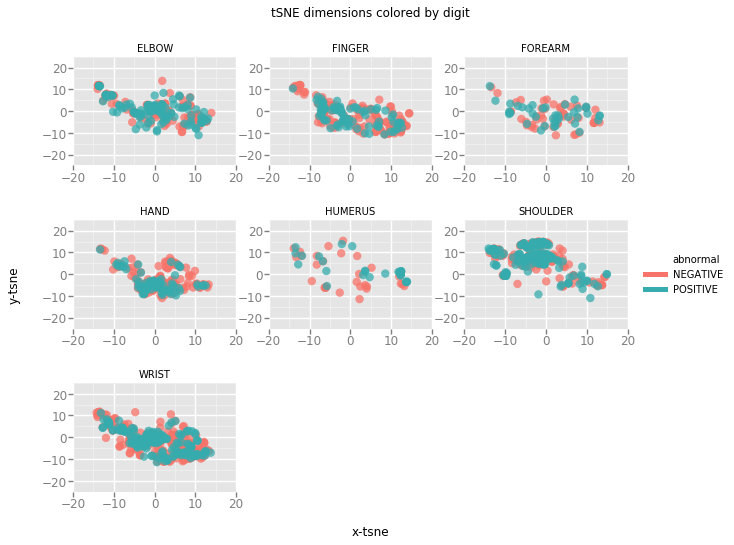

<ggplot: (7550208674)>

In [6]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='abnormal')) \
        + geom_point(size=70,alpha = .75)  \
        + facet_wrap("body_part") \
        + ggtitle("tSNE dimensions colored by digit")\
        + scale_y_continuous(limits=(-25,25)) \
        + scale_x_continuous(limits=(-20,20))
chart

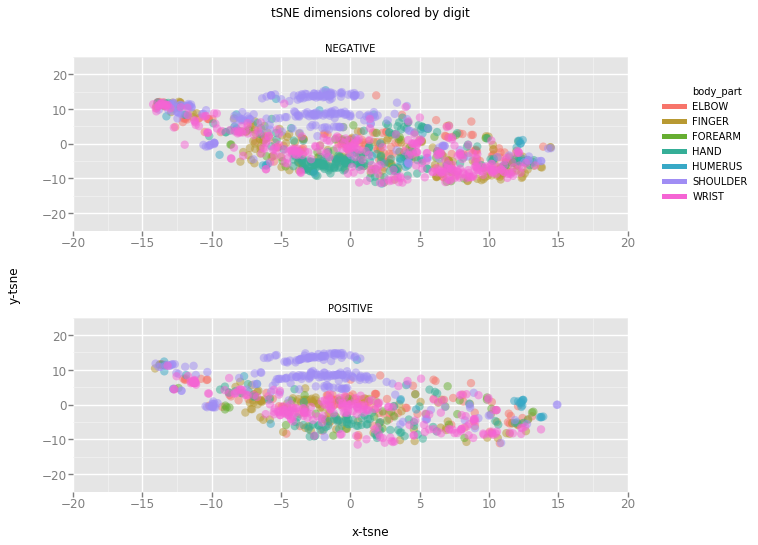

<ggplot: (-9223372029242005493)>

In [7]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='body_part') ) \
        + geom_point(size=70, alpha =.5) \
        + ggtitle("tSNE dimensions colored by digit")\
        + facet_wrap("abnormal") \
        + scale_y_continuous(limits=(-25,25)) \
        + scale_x_continuous(limits=(-20,20))
chart